Visualization of Parking Lot

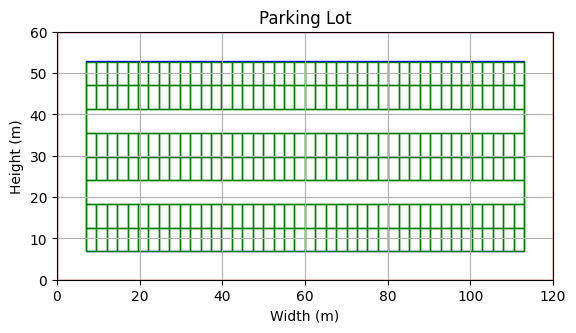

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Define parking lot dimensions
width = 120  # meters
height = 60  # meters

# Define margins
top_margin = 7
bottom_margin = 7
left_margin = 7
right_margin = 7

# Calculate inner rectangle dimensions
inner_width = width - left_margin - right_margin
inner_height = height - top_margin - bottom_margin

# Create figure and axis
fig, ax = plt.subplots()

# Draw outer rectangle
outer_rect = patches.Rectangle((0, 0), width, height, linewidth=1, edgecolor='r', facecolor='none')
ax.add_patch(outer_rect)

# Draw inner rectangle
inner_rect = patches.Rectangle((left_margin, bottom_margin), inner_width, inner_height, linewidth=1, edgecolor='b', facecolor='none')
ax.add_patch(inner_rect)

# Divide inner rectangle into 8 rows
row_heights = [5.6, 5.6, 6, 5.6, 5.6, 6, 5.6, 5.6]
row_widths = [inner_width / 42] * 42
current_height = bottom_margin
for i, (row_height, row_width) in enumerate(zip(row_heights, row_widths)):
    current_width = left_margin
    # Divide only specified rows into 42 columns
    if i in [0, 1, 3, 4, 6, 7]:
        for j in range(42):
            row_rect = patches.Rectangle((current_width, current_height), row_width, row_height, linewidth=1, edgecolor='g', facecolor='none')
            ax.add_patch(row_rect)
            current_width += row_width
    else:
        # Leave rows 3 and 6 with just one column
        row_rect = patches.Rectangle((left_margin, current_height), inner_width, row_height, linewidth=1, edgecolor='g', facecolor='none')
        ax.add_patch(row_rect)
    current_height += row_height

# Set axis limits and labels
ax.set_xlim(0, width)
ax.set_ylim(0, height)
ax.set_xlabel('Width (m)')
ax.set_ylabel('Height (m)')
ax.set_title('Parking Lot')

# Show plot
plt.gca().set_aspect('equal', adjustable='box')
plt.grid(True)
plt.show()


Generation of data and assigning parking spaces to vehicles

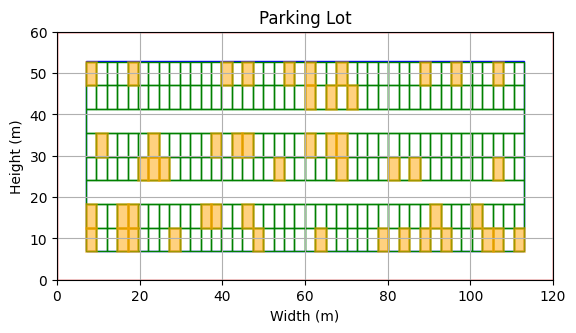

                                 tag_id                     timestamp manufactured_date                                     status  parking_space
0  c9d21e35-a4c9-4fe0-96c8-13fee1220422  2025-03-12 15:47:49 MDT-0600        2024-05-01  {'2025-03-12 15:47:49 MDT-0600': 'Enter'}             76
1  46102204-938c-4cf2-b0ab-4cf977b174b5  2025-03-12 15:47:49 MDT-0600        2024-05-01  {'2025-03-12 15:47:49 MDT-0600': 'Enter'}             47
2  c969ad41-462c-4ba3-86a0-4752cba077eb  2025-03-12 15:47:49 MDT-0600        2024-05-01  {'2025-03-12 15:47:49 MDT-0600': 'Enter'}            134
3  44133841-51ef-44aa-b196-c35c9cee34bd  2025-03-12 15:47:49 MDT-0600        2024-05-01  {'2025-03-12 15:47:49 MDT-0600': 'Enter'}            104
4  8501172c-4d68-44a1-ad97-923500111414  2025-03-12 15:47:49 MDT-0600        2024-05-01  {'2025-03-12 15:47:49 MDT-0600': 'Enter'}             92


In [45]:
import uuid
import random
import datetime
import pytz
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# ----- STEP 1: Generate RFID DataFrame -----
def generate_rfid():
    return str(uuid.uuid4())

def generate_timestamp(timezone='MST'):
    tz = pytz.timezone(timezone)
    return datetime.datetime.now(tz).strftime("%Y-%m-%d %H:%M:%S %Z%z")

def assign_parking_space():
    valid_spaces = list(range(1, 85)) + list(range(86, 170)) + list(range(172, 254))
    return random.choice(valid_spaces)

def simulate_rfid_readings(num_readings, timezone='MST'):
    data = {
        'tag_id': [],
        'timestamp': [],
        'manufactured_date': [],
        'status': [],
        'parking_space': []
    }

    assigned_spaces = set()

    for _ in range(num_readings):
        # Ensure unique parking assignments
        space = assign_parking_space()
        while space in assigned_spaces:
            space = assign_parking_space()
        assigned_spaces.add(space)

        timestamp = generate_timestamp(timezone)
        data['tag_id'].append(generate_rfid())
        data['timestamp'].append(timestamp)
        data['manufactured_date'].append('2024-05-01')
        data['status'].append({timestamp: 'Enter'})  # Store timestamp as key and 'Enter' as value
        data['parking_space'].append(space)

    return pd.DataFrame(data)

# Generate RFID data
num_readings = 50  # Simulating 50 cars parked
timezone = 'America/Denver'
df_simulated_readings = simulate_rfid_readings(num_readings, timezone)

# ----- STEP 2: Parking Lot Visualization -----

class ParkingLot:
    def __init__(self, df):
        self.df = df  # Store the DataFrame

        # Define parking lot dimensions
        self.width = 120  # meters
        self.height = 60  # meters

        # Define margins
        self.top_margin = 7
        self.bottom_margin = 7
        self.left_margin = 7
        self.right_margin = 7

        # Calculate inner rectangle dimensions
        self.inner_width = self.width - self.left_margin - self.right_margin
        self.inner_height = self.height - self.top_margin - self.bottom_margin

        # Create figure and axis
        self.fig, self.ax = plt.subplots()

        # Draw outer rectangle
        self.outer_rect = patches.Rectangle((0, 0), self.width, self.height, linewidth=1, edgecolor='r', facecolor='none')
        self.ax.add_patch(self.outer_rect)

        # Draw inner rectangle
        self.inner_rect = patches.Rectangle((self.left_margin, self.bottom_margin), self.inner_width, self.inner_height, linewidth=1, edgecolor='b', facecolor='none')
        self.ax.add_patch(self.inner_rect)

        # Define parking lot grid
        self.row_heights = [5.6, 5.6, 6, 5.6, 5.6, 6, 5.6, 5.6]  # Heights of rows
        self.row_widths = [self.inner_width / 42] * 42  # Equal column widths
        self.current_height = self.bottom_margin

        self.space_coordinates = {}  # Store coordinates for highlighting spaces

        # Draw parking spaces
        space_counter = 1  # Start from space 1
        for i, row_height in enumerate(self.row_heights):
            self.current_width = self.left_margin
            if i in [0, 1, 3, 4, 6, 7]:  # Rows with 42 spaces
                for j in range(42):
                    rect = patches.Rectangle((self.current_width, self.current_height), self.row_widths[j], row_height, linewidth=1, edgecolor='g', facecolor='none')
                    self.ax.add_patch(rect)
                    self.space_coordinates[space_counter] = (self.current_width, self.current_height, self.row_widths[j], row_height)
                    space_counter += 1
                    self.current_width += self.row_widths[j]
            else:  # Rows 3 and 6 with 1 full-width space
                rect = patches.Rectangle((self.left_margin, self.current_height), self.inner_width, row_height, linewidth=1, edgecolor='g', facecolor='none')
                self.ax.add_patch(rect)
                self.space_coordinates[space_counter] = (self.left_margin, self.current_height, self.inner_width, row_height)
                space_counter += 1
            self.current_height += row_height

        # Set axis limits and labels
        self.ax.set_xlim(0, self.width)
        self.ax.set_ylim(0, self.height)
        self.ax.set_xlabel('Width (m)')
        self.ax.set_ylabel('Height (m)')
        self.ax.set_title('Parking Lot')

        # Show initial grid
        plt.gca().set_aspect('equal', adjustable='box')
        plt.grid(True)

        # Highlight occupied spaces from RFID DataFrame
        self.highlight_occupied_spaces()

    def highlight_occupied_spaces(self):
        occupied_spaces = set(self.df['parking_space'])  # Extract assigned parking spaces

        for space in occupied_spaces:
            if space in self.space_coordinates:
                x, y, width, height = self.space_coordinates[space]
                rect = patches.Rectangle((x, y), width, height, linewidth=2, edgecolor='orange', facecolor='orange', alpha=0.5)
                self.ax.add_patch(rect)

        self.fig.canvas.draw()

# Visualize Parking Lot
parking_lot = ParkingLot(df_simulated_readings)
plt.show()
print(df_simulated_readings.head())


Retrieving the data specific to a tag_id

Enter the tag_id to retrieve details and highlight parking spot: 44133841-51ef-44aa-b196-c35c9cee34bd
                                 tag_id                     timestamp manufactured_date                                     status  parking_space
3  44133841-51ef-44aa-b196-c35c9cee34bd  2025-03-12 15:47:49 MDT-0600        2024-05-01  {'2025-03-12 15:47:49 MDT-0600': 'Enter'}            104


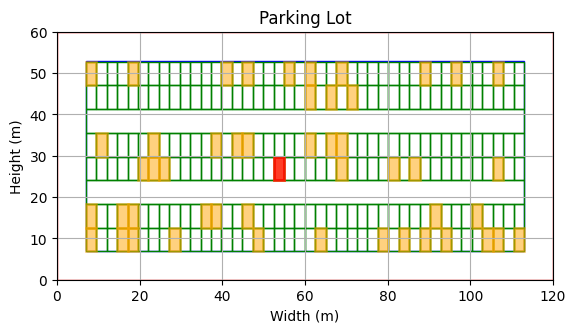

In [46]:
def retrieve_and_highlight_parking_spot(tag_id):
    # Retrieve data for the given tag_id
    row = df_simulated_readings[df_simulated_readings['tag_id'] == tag_id]

    if not row.empty:
        # Print the full details of the selected RFID
        print(row)

        # Retrieve the parking space associated with this tag_id
        parking_space = row['parking_space'].iloc[0]

        # Visualize parking lot and highlight the occupied space
        parking_lot = ParkingLot(df_simulated_readings)
        occupied_spaces = set(df_simulated_readings['parking_space'])

        # Highlight the specific parking spot
        if parking_space in parking_lot.space_coordinates:
            x, y, width, height = parking_lot.space_coordinates[parking_space]
            rect = patches.Rectangle((x, y), width, height, linewidth=2, edgecolor='red', facecolor='red', alpha=0.7)
            parking_lot.ax.add_patch(rect)
            parking_lot.fig.canvas.draw()

        # Show the plot with the highlighted space
        plt.show()

    else:
        print(f"No data found for tag_id: {tag_id}")

# Prompt user to input a tag_id
tag_id_input = input("Enter the tag_id to retrieve details and highlight parking spot: ")
retrieve_and_highlight_parking_spot(tag_id_input)


Updating the dataframe based on entry and exit of the vehicles into lot

In [47]:
import random
import datetime
import pytz

def generate_current_timestamp(timezone='America/Denver'):
    tz = pytz.timezone(timezone)
    return datetime.datetime.now(tz).strftime("%Y-%m-%d %H:%M:%S %Z%z")

# Select 5 random tag IDs from the dataframe
selected_tag_ids = random.sample(list(df_simulated_readings['tag_id']), 5)
print(selected_tag_ids)

# Generate the current timestamp
current_timestamp = generate_current_timestamp()

# Update the status column for the selected tag IDs
for tag_id in selected_tag_ids:
    existing_status = df_simulated_readings.loc[df_simulated_readings['tag_id'] == tag_id, 'status'].values[0]

    if isinstance(existing_status, dict):
        existing_status[current_timestamp] = "Exit"
    else:
        existing_status = {df_simulated_readings.loc[df_simulated_readings['tag_id'] == tag_id, 'timestamp'].values[0]: "Enter",
                           current_timestamp: "Exit for Inspection"}

    df_simulated_readings.loc[df_simulated_readings['tag_id'] == tag_id, 'status'] = [existing_status]

# Set pandas display options to show full content
pd.set_option('display.max_colwidth', None)  # Ensures full cell content is shown
pd.set_option('display.max_rows', None)  # Displays all rows if needed
pd.set_option('display.max_columns', None)  # Displays all columns
pd.set_option('display.width', 1000)  # Adjusts width for better readability

df_simulated_readings.loc[df_simulated_readings['tag_id'].isin(selected_tag_ids), 'parking_space'] = None
# Convert the 'parking_space' column to integers if not already

# Print the full DataFrame
print(df_simulated_readings)

# If you only want to see the updated rows:
print(df_simulated_readings.loc[df_simulated_readings['tag_id'].isin(selected_tag_ids)])



['3df0a098-a521-4b65-b484-b558296017f0', '7dd29392-8c2f-48a1-9755-85a2cf71a66d', 'ed919a25-e7bf-4cc9-b930-ac3d3e7b0e5b', '220ed4e9-1c88-4d81-ab9c-5ee4df5016a4', '002e15bc-2a33-49f1-b390-79ae7142847d']
                                  tag_id                     timestamp manufactured_date                                                                             status  parking_space
0   c9d21e35-a4c9-4fe0-96c8-13fee1220422  2025-03-12 15:47:49 MDT-0600        2024-05-01                                          {'2025-03-12 15:47:49 MDT-0600': 'Enter'}           76.0
1   46102204-938c-4cf2-b0ab-4cf977b174b5  2025-03-12 15:47:49 MDT-0600        2024-05-01                                          {'2025-03-12 15:47:49 MDT-0600': 'Enter'}           47.0
2   c969ad41-462c-4ba3-86a0-4752cba077eb  2025-03-12 15:47:49 MDT-0600        2024-05-01                                          {'2025-03-12 15:47:49 MDT-0600': 'Enter'}          134.0
3   44133841-51ef-44aa-b196-c35c9cee34bd  2025-03-1

In [49]:
from datetime import datetime
import random

# Generate new timestamp
new_timestamp = datetime.now().strftime('%Y-%m-%d %H:%M:%S %Z%z')

# Get existing parking spaces
existing_parking_spaces = set(df_simulated_readings['parking_space'].dropna())

# Function to generate unique parking space numbers
def get_unique_parking_space(existing_spaces, num_spaces=5):
    new_spaces = set()
    while len(new_spaces) < num_spaces:
        new_space = random.randint(1, 254)  # Assuming parking spaces are numbered 1-254
        if new_space not in existing_spaces and new_space not in new_spaces:
            new_spaces.add(new_space)
    return list(new_spaces)

# Generate 5 unique parking spaces
new_parking_spaces = get_unique_parking_space(existing_parking_spaces, num_spaces=5)

# Update the DataFrame for selected tag_ids
for i, tag_id in enumerate(selected_tag_ids):
    # Ensure the parking space is an integer
    df_simulated_readings.loc[df_simulated_readings['tag_id'] == tag_id, 'parking_space'] = int(new_parking_spaces[i])

    # Update the 'status' field with the new timestamp
    df_simulated_readings.loc[df_simulated_readings['tag_id'] == tag_id, 'status'].apply(lambda status: status.update({new_timestamp: 'Enter after inspection'}))


# Convert the 'parking_space' column to integers if not already
df_simulated_readings['parking_space'] = df_simulated_readings['parking_space'].astype(int)

# Print the updated DataFrame
print(df_simulated_readings)

# If you only want to see the updated rows:
print(df_simulated_readings.loc[df_simulated_readings['tag_id'].isin(selected_tag_ids)])


                                  tag_id                     timestamp manufactured_date                                                                                                                                                                                 status  parking_space
0   c9d21e35-a4c9-4fe0-96c8-13fee1220422  2025-03-12 15:47:49 MDT-0600        2024-05-01                                                                                                                                              {'2025-03-12 15:47:49 MDT-0600': 'Enter'}             76
1   46102204-938c-4cf2-b0ab-4cf977b174b5  2025-03-12 15:47:49 MDT-0600        2024-05-01                                                                                                                                              {'2025-03-12 15:47:49 MDT-0600': 'Enter'}             47
2   c969ad41-462c-4ba3-86a0-4752cba077eb  2025-03-12 15:47:49 MDT-0600        2024-05-01                                                   

Locating the vehicle using rtls sensor readings if not found in the assigned parking space in the lot

Enter the tag ID: 44133841-51ef-44aa-b196-c35c9cee34bd 
Tag with ID '44133841-51ef-44aa-b196-c35c9cee34bd ' is located at: (4.42 m, 48.82 m) with DOA 123.23 degrees
Section: 17
Timestamp: 2025-03-12 16:20:16 MDT-0600


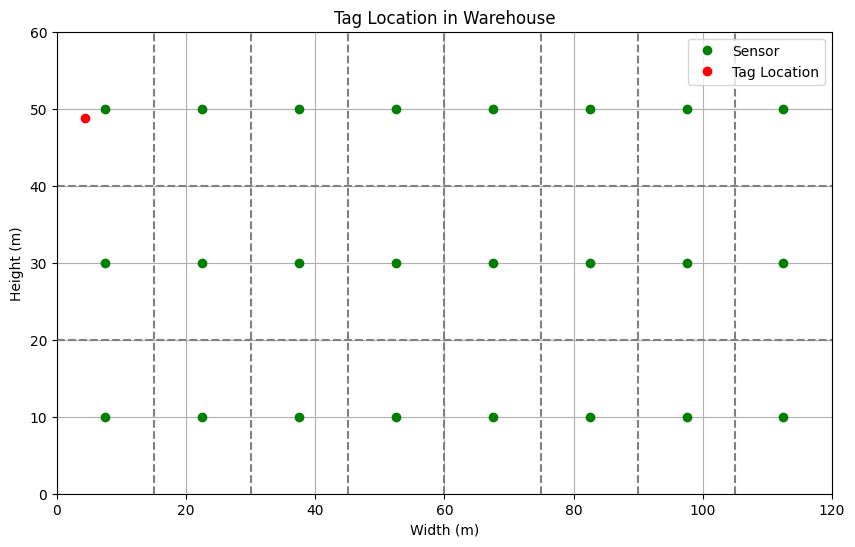

In [56]:
import numpy as np
import math
import random
import matplotlib.pyplot as plt
from datetime import datetime
import pytz

# Define constants
warehouse_width = 120  # Width of the warehouse in meters
warehouse_height = 60  # Height of the warehouse in meters
sensor_rows = 3  # Number of sensor rows (now 3)
sensor_cols = 8  # Number of sensor columns (now 8)
sensor_height = 10  # Height of sensors above ground level in meters
sensor_spacing_x = warehouse_width / sensor_cols  # Horizontal spacing between sensors
sensor_spacing_y = warehouse_height / sensor_rows  # Vertical spacing between sensors
sensor_radius = 7.5  # Sensing range of sensors in meters

# Function to calculate tag location from DOA
def calculate_tag_location(doa):
    # Convert DOA to radians
    theta = np.deg2rad(doa)  # Convert DOA from degrees to radians

    # Randomly select a sensor section
    section = random.randint(1, sensor_rows * sensor_cols)

    # Calculate sensor coordinates
    sensor_row = (section - 1) // sensor_cols
    sensor_col = (section - 1) % sensor_cols
    sensor_x = (sensor_col * sensor_spacing_x) + (sensor_spacing_x / 2)
    sensor_y = (sensor_row * sensor_spacing_y) + (sensor_spacing_y / 2)

    # Calculate horizontal and vertical angles
    alpha = math.atan(sensor_x / sensor_height)  # Horizontal angle in radians
    beta = math.atan(sensor_y / sensor_height)   # Vertical angle in radians

    # Calculate Cartesian coordinates (x, y)
    x = sensor_x + sensor_radius * math.tan(alpha) * math.cos(theta)  # Horizontal distance in meters
    y = sensor_y + sensor_radius * math.tan(beta) * math.sin(theta)    # Vertical distance in meters

    # Adjust coordinates to fit within warehouse dimensions
    x = min(max(x, 0), warehouse_width)    # Ensure x-coordinate is within [0, warehouse_width]
    y = min(max(y, 0), warehouse_height)   # Ensure y-coordinate is within [0, warehouse_height]

    # Find section based on tag location
    section_x = int(x // sensor_spacing_x)  # Column (horizontal)
    section_y = int(y // sensor_spacing_y)  # Row (vertical)

    # Convert to section number (1 to sensor_rows * sensor_cols)
    section = section_y * sensor_cols + section_x + 1

    return x, y, section

# Function to generate random DOA value between 0 and 180 degrees
def generate_random_doa():
    return random.uniform(0, 180)

# Function to generate timestamp with given timezone
def generate_timestamp(timezone):
    tz = pytz.timezone(timezone)
    timestamp = datetime.now(tz)
    return timestamp.strftime("%Y-%m-%d %H:%M:%S %Z%z")

# Function to determine tag location based on tag ID
def determine_tag_location(tag_id):
    # Generate random DOA value
    doa = generate_random_doa()

    # Calculate tag location based on generated DOA
    tag_location = calculate_tag_location(doa)
    timestamp = generate_timestamp('America/Denver')
    print("Tag with ID '{}' is located at: ({:.2f} m, {:.2f} m) with DOA {:.2f} degrees".format(tag_id, tag_location[0], tag_location[1], doa))
    print("Section:", tag_location[2])
    print("Timestamp:", timestamp)

    # Visualize the warehouse and tag location
    visualize_warehouse(tag_location)

# Function to visualize the warehouse and tag location
def visualize_warehouse(tag_location):
    # Create a plot for the warehouse (120x60 meters)
    plt.figure(figsize=(10, 6))

    # Plot sensors
    for row in range(sensor_rows):
        for col in range(sensor_cols):
            sensor_x = col * sensor_spacing_x + sensor_spacing_x / 2
            sensor_y = row * sensor_spacing_y + sensor_spacing_y / 2
            plt.plot(sensor_x, sensor_y, 'go', label='Sensor' if row == 0 and col == 0 else "")  # Green circles for sensors

    # Plot the tag location
    plt.plot(tag_location[0], tag_location[1], 'ro', label='Tag Location')  # Red circle for tag location

    # Highlight the section boundaries
    for i in range(1, sensor_cols):
        plt.axvline(x=i * sensor_spacing_x, color='gray', linestyle='--')  # Vertical section lines
    for i in range(1, sensor_rows):
        plt.axhline(y=i * sensor_spacing_y, color='gray', linestyle='--')  # Horizontal section lines

    # Set plot limits
    plt.xlim(0, warehouse_width)
    plt.ylim(0, warehouse_height)

    # Set labels
    plt.title("Tag Location in Warehouse")
    plt.xlabel("Width (m)")
    plt.ylabel("Height (m)")

    # Show grid and legend
    plt.grid(True)
    plt.legend()

    # Show the plot
    plt.show()

# Example usage
tag_id = input("Enter the tag ID: ")  # Take tag ID as input
determine_tag_location(tag_id)
